# Predicting the Closing Price of S&P500

### This Python code is part of my final dissertation for my Masters degree in Financial Mathematics, where the goal was to compare the traditional methods of Econometrics with the most modern methods of Machine Learning. Here I will simply illustrate the Machine Learning methods with the Linear Regression, Support Vector Regression and Random Forest algorithms. 

Source codes for Python Machine Learning By Example 2nd Edition (Packt Publishing)

Chapter 9: Stock Price Prediction with Regression Algorithms

Author: Yuxi (Hayden) Liu

Modified by: Amadú Baldé

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import seaborn as sns
import mplfinance as mpf

The data refers to the S&P500 stock market index, on which we want to predict the closing prices of the series. It's important to notice that accurate predictions of stock market closing prices can assist in making informed investment decisions.

The data set consists of 5 variables:
- Date: The date of the stock market observation.
- Open: The opening price of the S&P500 index for that day.
- High: The highest price reached by the S&P500 index during that day.
- Low: The lowest price reached by the S&P500 index during that day.
- Close: The closing price of the S&P500 index for that day.
- Adj Close: The adjusted closing price of the S&P500 index, which takes into account factors like dividends and stock splits.
- Volume: The trading volume, i.e., the number of shares traded for that day.


In [16]:
data_raw = pd.read_csv('SP2000_2019Day.csv')
data_raw.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [17]:
data_raw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4838,2019-03-28,2809.399902,2819.709961,2798.770020,2815.439941,2815.439941,3158170000
4839,2019-03-29,2828.270020,2836.030029,2819.229980,2834.399902,2834.399902,3740700000
4840,2019-04-01,2848.629883,2869.399902,2848.629883,2867.189941,2867.189941,3500760000
4841,2019-04-02,2868.239990,2872.899902,2858.750000,2867.239990,2867.239990,3246900000
4842,2019-04-03,2876.090088,2885.250000,2865.169922,2873.399902,2873.399902,3550240000


Here's an explanation of the significance of each variable in the context of financial analysis and forecasting:

1. Date: The date variable represents the chronological order of the stock market observations. While it may not have a direct impact on the prediction of closing prices, it plays a crucial role in organizing and analyzing the data over time.

2. Open: The opening price is the price at which the S&P500 index starts trading at the beginning of the day. It provides an initial reference point for the market's sentiment and can be used in combination with other variables to identify patterns or trends.

3. High: The high price represents the highest value reached by the S&P500 index during a specific trading day. It indicates the maximum level of bullishness or buying pressure experienced in the market.

4. Low: The low price represents the lowest value reached by the S&P500 index during a specific trading day. It indicates the minimum level of bearishness or selling pressure experienced in the market.

5. Close: The closing price is the final price of the S&P500 index at the end of a trading day. It is considered one of the most important variables in financial analysis and forecasting. The closing price reflects the overall market sentiment and the collective buying or selling decisions made by investors throughout the day. It is often used as a reference for calculating various technical indicators and predicting future market trends.

6. Adj Close: The adjusted closing price takes into account factors such as dividends, stock splits, and other corporate actions that affect the price. It provides a more accurate representation of the stock's true value and is commonly used in financial analysis.

7. Volume: The trading volume represents the number of shares traded during a specific trading day. It provides insights into market liquidity, i.e., the ease with which stocks can be bought or sold. High trading volume is often associated with increased market activity and can indicate the level of interest or participation by investors. Volume is useful in confirming trends, identifying market reversals, and assessing the overall market sentiment.

In a first analysis of the data, we see that our data set is composed by 4842 observations start at 2000-01-03 and ending at 2019-04-03, being all the variables numerical except the time variable that by the way is not in the right format and we will have to correct it, once corrected we will verify the format again. Before we move to another step we verify the existence of missing values, which we will see that we don't have their presence, this ensures the reliability of the data and allows for accurate analysis.

In [18]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4843 non-null   object 
 1   Open       4843 non-null   float64
 2   High       4843 non-null   float64
 3   Low        4843 non-null   float64
 4   Close      4843 non-null   float64
 5   Adj Close  4843 non-null   float64
 6   Volume     4843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.0+ KB


In [19]:
data_raw['Date'] = pd.to_datetime(data_raw.Date,format='%Y-%m-%d')
data_raw.index = data_raw['Date']

In [20]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4843 entries, 2000-01-03 to 2019-04-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4843 non-null   datetime64[ns]
 1   Open       4843 non-null   float64       
 2   High       4843 non-null   float64       
 3   Low        4843 non-null   float64       
 4   Close      4843 non-null   float64       
 5   Adj Close  4843 non-null   float64       
 6   Volume     4843 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 302.7 KB


In [21]:
print("checking if any null values are present\n", data_raw.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In order to predict closing prices accurately, it is not sufficient to rely solely on the available variables in the dataset. Using only these variables may lead to undervalued results that do not reflect the true reality. Therefore, feature engineering is employed to achieve better results.

According to Yu et al. (2016), feature engineering is the process of creating concrete variables from existing ones. This construction requires prior knowledge of the subject matter, and its implementation is often challenging and time-consuming.

Taking into account the factors that investors consider important for analysis and decision-making, thirty-one variables were created based on the existing variables. These variables include:

1. Average closing price of the last 5 days (AvgPrice5)
2. Average closing price of the previous month (AvgPrice30)
3. Average closing price of the previous year (AvgPrice365)
4. Ratio between the average price of the last 5 days and the previous month (AvgPrice5/AvgPrice30)
5. Ratio between the average price of the last 5 days and the previous year (AvgPrice5/AvgPrice30)
6. Ratio between the average price of the previous month and the previous year (AvgPrice30/AvgPrice30)
7. Average volume of the last 5 days (AvgVolume5)
8. Average volume of the previous month (AvgVolume30)
9. Average volume of the previous year (AvgVolume365)
10. Ratio between the average volume of the last 5 days and the previous month (AvgVolume5/AvgVolume30)
11. Ratio between the average volume of the last 5 days and the previous year (AvgVolume5/AvgVolume365)
12. Ratio between the average volume of the previous month and the previous year (AvgVolume30/AvgVolume365)
13. Standard deviation of the closing price of the last 5 days (StdPrice5)
14. Standard deviation of the closing price of the previous month (StdPrice30)
15. Standard deviation of the closing price of the previous year (StdPrice365)
16. Ratio between the standard deviation of the closing price of the last 5 days and the previous month (StdPrice5/StdPrice30)
17. Ratio between the standard deviation of the closing price of the last 5 days and the previous year (StdPrice5/StdPrice365)
18. Ratio between the standard deviation of the closing price of the previous month and the previous year (StdPrice30/StdPrice365)
19. Standard deviation of the volume of the last 5 days (StdVolume5)
20. Standard deviation of the volume of the previous month (StdVolume30)
21. Standard deviation of the volume of the previous year (StdVolume365)
22. Ratio between the standard deviation of the volume of the last 5 days and the previous month (StdVolume5/StdVolume30)
23. Ratio between the standard deviation of the volume of the last 5 days and the previous year (StdVolume5/StdVolume365)
24. Ratio between the standard deviation of the volume of the previous month and the previous year (StdVolume30/StdVolume365)
25. Daily return of the previous day (return i:i-1)
26. Weekly return of the previous week (return i:i-5)
27. Monthly return of the previous month (return i:i-30)
28. Annual return of the previous year (return i:i-365)
29. Moving average of the daily returns of the last 5 days (MovingAvgi_5)
30. Moving average of the daily returns of the previous month (MovingAvgi_30)
31. Moving average of the daily returns of the previous year (MovingAvgi_365)

These new variables were created based on six original variables:
- Opening price: OpenPricei
- Opening price of the previous day: OpenPricei-1
- Closing price of the previous day: ClosePricei-1
- Highest price of the previous day: HighPricei-1
- Lowest price of the previous day: LowPricei-1
- Volume of the previous day: VolumePricei-1

In [22]:
def generate_features(df):
    """
    Generate features for a stock/index based on historical price and performance
    @param df: dataframe with columns "Open", "Close", "High", "Low", "Volume", "Adjusted Close"
    @return: dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    # 6 original features
    df_new['open'] = df['Open']
    df_new['open_1'] = df['Open'].shift(1)
    df_new['close_1'] = df['Close'].shift(1)
    df_new['high_1'] = df['High'].shift(1)
    df_new['low_1'] = df['Low'].shift(1)
    df_new['volume_1'] = df['Volume'].shift(1)
    # 31 generated features
    # average price
    df_new['avg_price_5'] = df['Close'].rolling(5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(21).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    # average volume
    df_new['avg_volume_5'] = df['Volume'].rolling(5).mean().shift(1)
    df_new['avg_volume_30'] = df['Volume'].rolling(21).mean().shift(1)
    df_new['avg_volume_365'] = df['Volume'].rolling(252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] = df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] = df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] = df_new['avg_volume_30'] / df_new['avg_volume_365']
    # standard deviation of prices
    df_new['std_price_5'] = df['Close'].rolling(5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(21).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(252).std().shift(1)
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
    # standard deviation of volumes
    df_new['std_volume_5'] = df['Volume'].rolling(5).std().shift(1)
    df_new['std_volume_30'] = df['Volume'].rolling(21).std().shift(1)
    df_new['std_volume_365'] = df['Volume'].rolling(252).std().shift(1)
    df_new['ratio_std_volume_5_30'] = df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] = df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] = df_new['std_volume_30'] / df_new['std_volume_365']
    # # return
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] = df_new['return_1'].rolling(5).mean().shift(1)
    df_new['moving_avg_30'] = df_new['return_1'].rolling(21).mean().shift(1)
    df_new['moving_avg_365'] = df_new['return_1'].rolling(252).mean().shift(1)
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

In [23]:
data = generate_features(data_raw)
print("checking if any null values are present\n", data.isna().sum())

print(data.tail(5))

checking if any null values are present
 open                       0
open_1                     0
close_1                    0
high_1                     0
low_1                      0
volume_1                   0
avg_price_5                0
avg_price_30               0
avg_price_365              0
ratio_avg_price_5_30       0
ratio_avg_price_5_365      0
ratio_avg_price_30_365     0
avg_volume_5               0
avg_volume_30              0
avg_volume_365             0
ratio_avg_volume_5_30      0
ratio_avg_volume_5_365     0
ratio_avg_volume_30_365    0
std_price_5                0
std_price_30               0
std_price_365              0
ratio_std_price_5_30       0
ratio_std_price_5_365      0
ratio_std_price_30_365     0
std_volume_5               0
std_volume_30              0
std_volume_365             0
ratio_std_volume_5_30      0
ratio_std_volume_5_365     0
ratio_std_volume_30_365    0
return_1                   0
return_5                   0
return_30                  0
re

Feature engineering is a process of creating new variables or features based on existing variables in order to enhance the predictive power of a model. In this particular case, the engineered features are designed to capture important aspects that are relevant for investors' decision-making process. Here's how these new variables capture key aspects:

- Historical Prices: The engineered features include variables such as the average closing price of the last 5 days (𝐴𝑣𝑔𝑃𝑟𝑖𝑐𝑒5), average closing price of the previous month (𝐴𝑣𝑔𝑃𝑟𝑖𝑐𝑒30), and average closing price of the previous year (𝐴𝑣𝑔𝑃𝑟𝑖𝑐𝑒365). These variables provide insights into the recent and past price trends, allowing investors to assess the historical performance of the stock.

- Volume: The engineered features also consider volume-related variables. For example, average volume of the last 5 days (𝐴𝑣𝑔𝑉𝑜𝑙𝑢𝑚𝑒5), average volume of the previous month (𝐴𝑣𝑔𝑉𝑜𝑙𝑢𝑚𝑒30), and average volume of the previous year (𝐴𝑣𝑔𝑉𝑜𝑙𝑢𝑚𝑒365) are included. These features reflect the recent and historical trading activity, providing insights into the liquidity and market interest in the stock.

- Market Volatility: To capture market volatility, the engineered features include variables such as the standard deviation of the closing prices of the last 5 days (𝑆𝑡𝑑𝑃𝑟𝑖𝑐𝑒5), standard deviation of the closing prices of the previous month (𝑆𝑡𝑑𝑃𝑟𝑖𝑐𝑒30), and standard deviation of the closing prices of the previous year (𝑆𝑡𝑑𝑃𝑟𝑖𝑐𝑒365). These variables quantify the price variability, allowing investors to assess the level of risk and uncertainty associated with the stock.

- Investment Returns: The engineered features also consider various measures of investment returns. Variables such as daily return of the previous day (𝑟𝑒𝑡𝑢𝑟𝑛i:i-1), weekly return of the previous week (𝑟𝑒𝑡𝑢𝑟𝑛i:i-5), monthly return of the previous month (𝑟𝑒𝑡𝑢𝑟𝑛i:i-30), and annual return of the previous year (𝑟𝑒𝑡𝑢𝑟𝑛i:i-365) are included. These features provide insights into the performance of the stock over different time horizons, helping investors assess the profitability of their investments.

By incorporating these engineered features into the analysis, the algorithm can leverage a broader set of information beyond just the variables available in the dataset. This allows for a more comprehensive understanding of the stock's behavior, taking into account historical prices, volume, market volatility, and investment returns.

In [24]:
data.head(5)

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-04,1347.560059,1283.270020,1347.560059,1347.760010,1274.619995,1.880700e+09,1322.850025,1330.199527,1426.332934,0.994475,...,2.049334,1.351298,0.050099,0.024613,0.024581,-0.037058,-0.003395,-0.001017,-0.000400,1333.339966
2001-01-05,1333.339966,1347.560059,1333.339966,1350.239990,1329.140015,2.131000e+09,1323.734009,1330.598098,1426.060037,0.994841,...,2.754246,1.631346,-0.010552,0.003326,0.006317,-0.049048,0.005209,0.001359,-0.000049,1298.349976
2001-01-08,1298.349976,1333.339966,1298.349976,1334.770020,1294.949951,1.430800e+09,1316.560010,1326.874762,1425.642974,0.992226,...,2.456225,1.570718,-0.026242,-0.026885,-0.056802,-0.074887,0.001011,0.000504,-0.000098,1295.859985
2001-01-09,1295.859985,1298.349976,1295.859985,1298.349976,1276.290039,1.115500e+09,1311.676001,1324.227144,1425.065156,0.990522,...,2.358370,1.578099,-0.001918,-0.018496,-0.041141,-0.101015,-0.005035,-0.002599,-0.000206,1300.800049
2001-01-10,1300.800049,1295.859985,1300.800049,1311.719971,1295.140015,1.191300e+09,1315.182007,1322.191430,1424.442935,0.994699,...,2.287019,1.570177,0.003812,0.013660,-0.031819,-0.107574,-0.003329,-0.001823,-0.000321,1313.270020


(3626, 37)
(3626,)
(963, 37)


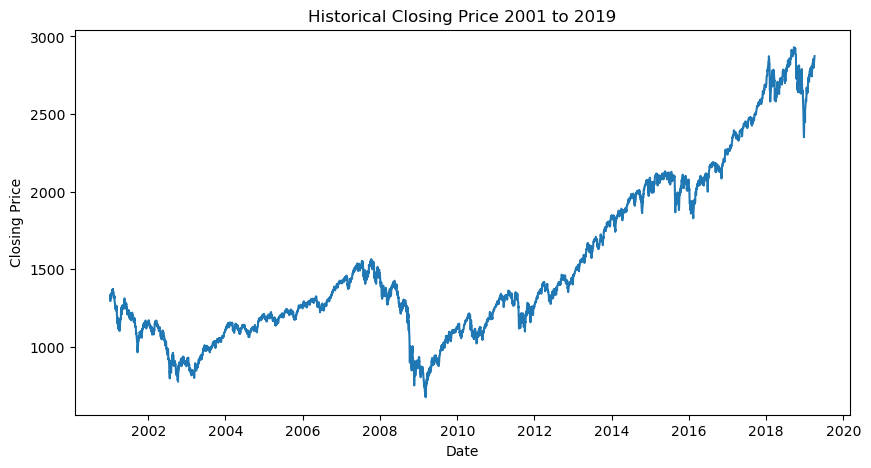

In [28]:
#plot
plt.figure(figsize=(10,5))
plt.plot(data['close'], label='close Price history')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Closing Price 2001 to 2019')


start_train = '2001-01-03'
end_train = '2015-06-07'
    
start_test = '2015-06-08'
end_test = '2019-04-03'
    
data_train = data.loc[start_train:end_train]
X_train = data_train.drop('close', axis=1).values
y_train = data_train['close'].values
    
print(X_train.shape)
print(y_train.shape)
    
data_test = data.loc[start_test:end_test]
X_test = data_test.drop('close', axis=1).values
y_test = data_test['close'].values
    
print(X_test.shape)


/Users/amadubalde/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


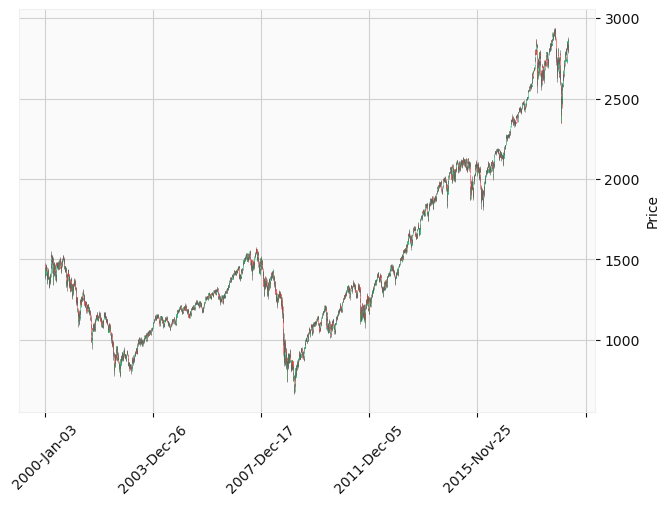

In [38]:

ohlc_data = data_raw[['Date', 'Open', 'High', 'Low', 'Close']]
ohlc_data.set_index('Date', inplace=True)

# Create the candlestick chart
mpf.plot(ohlc_data, type='candle', style='yahoo')


In [12]:
# MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
# First experiment with linear regression
    
scaler = StandardScaler()
    
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
    
start_lr = time.time()
    
param_grid = {
        "alpha": [1e-5, 3e-5, 1e-4],
        "eta0": [0.01, 0.03, 0.1],
        }
    

In [14]:
# Regression

    
lr = SGDRegressor(penalty='l2', max_iter=1000)

#Grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled_train, y_train)
    
print(grid_search.best_params_)
    
lr_best = grid_search.best_estimator_


#Prediction
predictions_lr = lr_best.predict(X_scaled_test)
    
#Metrics
print('Linear Regression')
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lr)))
print('RMSE: {0:.3f}'.format((mean_squared_error(y_test, predictions_lr))**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lr)))
print('MAPE: {0:.3f}'.format(mean_absolute_percentage_error(y_test, predictions_lr)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lr)))

    
end_lr = time.time()
print('Tempo de execução LR : %f' % (end_lr - start_lr))


{'alpha': 1e-05, 'eta0': 0.03}
Linear Regression
MSE: 499.111
RMSE: 22.341
MAE: 15.220
MAPE: 0.645
R^2: 0.995
Tempo de execução LR : 14.491191


In [19]:
# Experiment with random forest

start_rf=time.time()

param_grid = {
    'max_depth': [50, 70, 80],
    'min_samples_split': [5, 10],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [3, 5]

}


from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
rf_best = grid_search.best_estimator_

predictions_rf = rf_best.predict(X_test)

print('Random Forest Regressor')
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_rf)))
print('RMSE: {0:.3f}'.format((mean_squared_error(y_test, predictions_rf))**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_rf)))
print('MAPE: {0:.3f}'.format(mean_absolute_percentage_error(y_test, predictions_rf)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_rf)))


end_rf=time.time()
print('Tempo de execução RF : %f' % (end_rf - start_rf))

{'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 10}
Random Forest Regressor
MSE: 165265.511
RMSE: 406.529
MAE: 304.805
MAPE: 11.546
R^2: -0.801
Tempo de execução RF : 312.295116


In [15]:
# Experiment with SVR

start_svr=time.time()

param_grid = [
    {'kernel': ['linear'], 'C': [100, 300, 500], 'epsilon': [0.00003, 0.0001]},
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [10, 100, 1000], 'epsilon': [0.00003, 0.0001]}
]


from sklearn.svm import SVR

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=2, scoring='r2')
grid_search.fit(X_scaled_train, y_train)

print(grid_search.best_params_)

svr_best = grid_search.best_estimator_

predictions_svr = svr_best.predict(X_scaled_test)

print('SVR')
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_svr)))
print('RMSE: {0:.3f}'.format((mean_squared_error(y_test, predictions_svr))**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_svr)))
print('MAPE: {0:.3f}'.format(mean_absolute_percentage_error(y_test, predictions_svr)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_svr)))

end_svr = time.time()
print('Tempo de execução SVR : %f' % (end_svr - start_svr))

{'C': 500, 'epsilon': 0.0001, 'kernel': 'linear'}
SVR
MSE: 353.342
RMSE: 18.797
MAE: 12.462
MAPE: 0.526
R^2: 0.996
Tempo de execução SVR : 222.844124


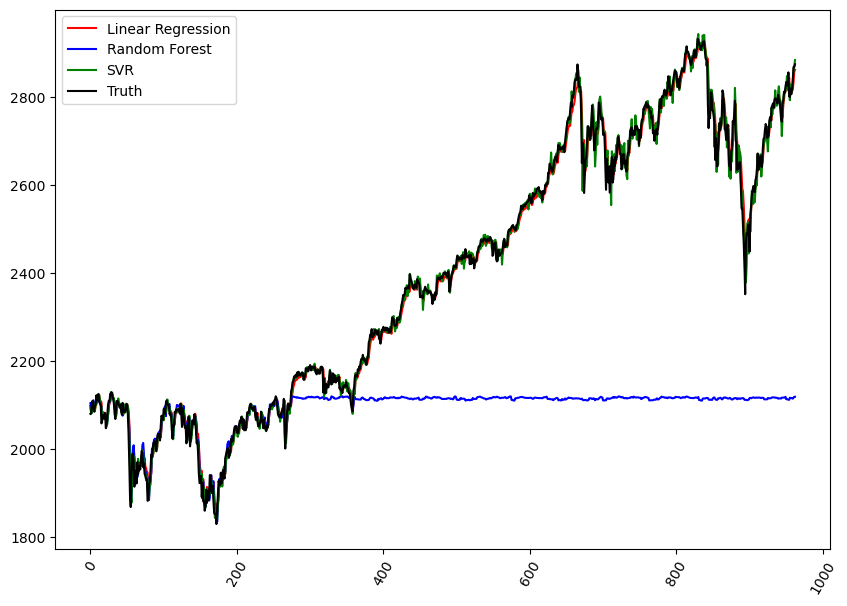

In [20]:
plt.figure(figsize=(10,7))

plt.plot(predictions_lr, color='red', label='Linear Regression')
plt.plot(predictions_rf, color='blue', label='Random Forest')
plt.plot(predictions_svr, color='green', label='SVR')
plt.plot(y_test, color = 'black', label = 'Truth')


# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()